'E'

In [55]:
import pickle
import wntr
from utils.Districts import combine_districts

import pickle
import wntr
from utils.Districts import combine_districts

exp = 'Graeme_D_2_LL_LH__LL_MH_LL_LL_LM_'
exp = 'Graeme_D_2_LL_MH__ML_MM_HL_LL_LM_'

# exp = 'Graeme_D_2_LL_LM__LM_LL_LH_LL_ML_'

dist = 'D'
path_init = f'{exp}_District_{dist}_initial'

with open(f'networks/assignments/{path_init}.pkl', 'rb') as file:
    district_init = pickle.load(file)

# Create a visual chart of combined districts (optional visualization)
chart = combine_districts(
    district_nodes=district_init,
    plot_size=(600, 400)
)

display(chart)

display(district_init[f'District_{dist}']['assignments'].plot_interactive_assignments())

path_final = f'{exp}_District_{dist}_final'

with open(f'networks/assignments/{path_final}.pkl', 'rb') as file:
    district_final = pickle.load(file)

district_final[f'District_{dist}']['assignments'].plot_interactive_assignments()



alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

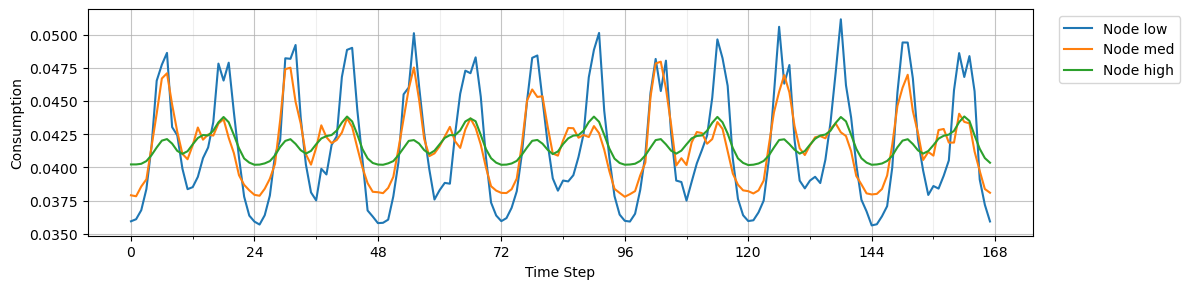

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.Tbx_Simulation import generate_weekly_consumption_patterns, plot_node_time_series
from utils.configs import DISTRIBUTION_PATTERNS

low_config = DISTRIBUTION_PATTERNS.get('low')
cnsp_LOW = generate_weekly_consumption_patterns(base_demand=10, n_intervals=24, n_days=7,
                                                morning_peak=low_config[0], afternoon_peak=low_config[1],
                                                evening_peak=low_config[2], night_consumption=low_config[3],
                                                variation_strength=low_config[4])

med_config = DISTRIBUTION_PATTERNS.get('medium')
cnsp_MED = generate_weekly_consumption_patterns(base_demand=10, n_intervals=24, n_days=7,
                                                morning_peak=med_config[0], afternoon_peak=med_config[1],
                                                evening_peak=med_config[2], night_consumption=med_config[3],
                                                variation_strength=med_config[4])

high_config = DISTRIBUTION_PATTERNS.get('high')
cnsp_HIGH = generate_weekly_consumption_patterns(base_demand=10, n_intervals=24, n_days=7,
                                                 morning_peak=high_config[0], afternoon_peak=high_config[1],
                                                 evening_peak=high_config[2], night_consumption=high_config[3],
                                                 variation_strength=high_config[4])

qwe = {'low': {'full_series': np.concatenate(cnsp_LOW)},
       'med': {'full_series': np.concatenate(cnsp_MED)},
       'high': {'full_series': np.concatenate(cnsp_HIGH)}
       }

plt.figure(figsize=(12, 3))
for node_id in ['low', 'med', 'high']:
    if node_id not in qwe:
        print(f"Node {node_id} not found.")
        continue

    series = qwe[node_id]['full_series']

    plt.plot(series, label=f'Node {node_id}')

major_ticks = np.arange(0, len(series) + 1, 24)
minor_ticks = np.arange(0, len(series) + 1, 12)

plt.xticks(major_ticks)
plt.xticks(minor_ticks, minor=True)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.75)

plt.xlabel('Time Step')
plt.ylabel('Consumption')

plt.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

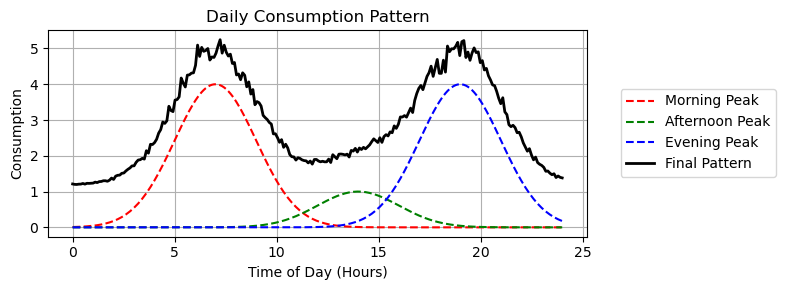

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def generate_daily_consumption_pattern(daily_consumption=1.0, n_intervals=48,
                                       morning_peak=1.5, evening_peak=1.3, afternoon_peak=1.4,
                                       night_consumption=0.5, variation_strength=0.05,
                                       plot=True):
    """
    Generates and plots a daily consumption pattern with Gaussian peaks for morning, afternoon, and evening.

    Parameters:
    - daily_consumption: Total daily consumption to normalize to.
    - n_intervals: Number of intervals (default is 48 for 30-min intervals).
    - morning_peak: Peak multiplier for morning Gaussian.
    - evening_peak: Peak multiplier for evening Gaussian.
    - afternoon_peak: Peak multiplier for afternoon Gaussian.
    - night_consumption: Base consumption during non-peak hours.
    - variation_strength: Std dev of random variation.
    - plot: Whether to plot the pattern.

    Returns:
    - daily_pattern_scaled: Normalized daily consumption pattern (np.array).
    """
    time = np.linspace(0, 24, n_intervals)

    # Gaussian peaks
    morning = np.exp(-0.5 * ((time - 7) / 2) ** 2)
    afternoon = np.exp(-0.5 * ((time - 14) / 2) ** 2)
    evening = np.exp(-0.5 * ((time - 19) / 2) ** 2)

    # Combined pattern with base night consumption
    pattern = (morning_peak * morning +
               afternoon_peak * afternoon +
               evening_peak * evening +
               night_consumption * (1 - morning - afternoon - evening))

    # Add random variation
    random_variation = np.random.normal(1, variation_strength, n_intervals)
    daily_pattern = pattern * random_variation + daily_consumption

    # Normalize
    daily_pattern_total = np.sum(daily_pattern)
    if np.isnan(daily_pattern_total) or np.isinf(daily_pattern_total) or daily_pattern_total == 0:
        raise ValueError("Invalid total consumption calculated.")

    daily_pattern_scaled = daily_pattern / daily_pattern_total * daily_consumption

    if plot:
        plt.figure(figsize=(8, 3))
        plt.plot(time, morning_peak * morning, 'r--', label='Morning Peak')
        plt.plot(time, afternoon_peak * afternoon, 'g--', label='Afternoon Peak')
        plt.plot(time, evening_peak * evening, 'b--', label='Evening Peak')
        plt.plot(time, daily_pattern, 'k-', label='Final Pattern', linewidth=2)
        plt.title('Daily Consumption Pattern')
        plt.xlabel('Time of Day (Hours)')
        plt.ylabel('Consumption')
        plt.legend(bbox_to_anchor = (1.05,.75))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return daily_pattern_scaled


low_multipliers = generate_daily_consumption_pattern(daily_consumption=1.0, n_intervals=240,
                                        morning_peak=low_config[0], afternoon_peak=low_config[1],
                                                evening_peak=low_config[2], night_consumption=low_config[3],
                                                variation_strength=0.05)

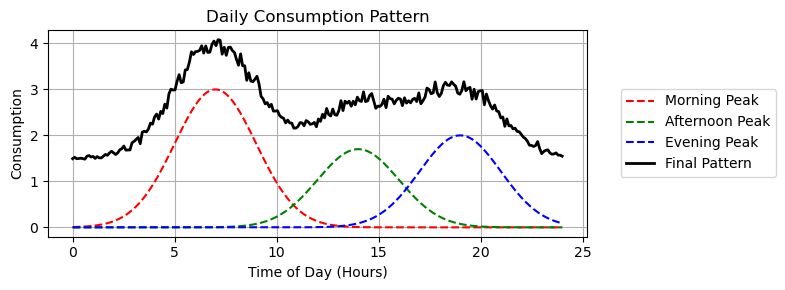

In [31]:
med_multipliers = generate_daily_consumption_pattern(daily_consumption=1.0, n_intervals=240,
                                        morning_peak=med_config[0], afternoon_peak=med_config[1],
                                                evening_peak=med_config[2], night_consumption=med_config[3],
                                                variation_strength=0.05)

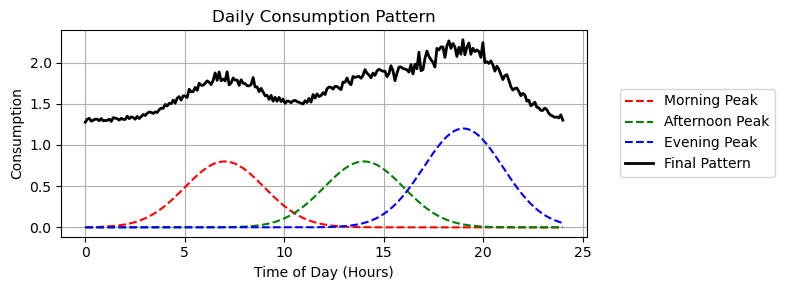

In [33]:
high_multipliers = generate_daily_consumption_pattern(daily_consumption=1.0, n_intervals=240,
                                        morning_peak=high_config[0], afternoon_peak=high_config[1],
                                                evening_peak=high_config[2], night_consumption=high_config[3],
                                                variation_strength=0.05)

In [ ]:
import glob
import os
import shutil
import subprocess

folders = [
    f.replace('my_collection\\', '') for f in glob.glob(f'my_collection/Balerma*')
    if os.path.isdir(f)
]
folders

In [ ]:
args.id_network

In [ ]:
import pickle
from multiprocessing.managers import Namespace

import pandas as pd
import numpy as np
import wntr
from atmn import ScenarioCollection

for case in folders:
    # Load generated scenarios using the ScenarioCollection class
    my_collection = ScenarioCollection('my_collection')
    my_scenario = my_collection.get_scenario(case)

    save_path = f'../data_leaks/{args.id_network}/{case.replace("Balerma_", "").replace("_Random_Multiple", "")}'
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for feature in ['Flow', 'Demand', 'Pressure']:
        leak_configs = my_scenario.list_configs()['LeakConfigs']

        aux_data = []  # Melted data for plotting
        aux_data_leak = []  # Raw leak time series

        var_id = 'pipeId' if feature.lower() == 'flow' else 'node'

        # Process each leak scenario for this feature
        for leak_scenario in leak_configs:
            data_scenario = my_scenario.get(leak_scenario, 'DefaultSensors', 'GT')
            df_feat = data_scenario[feature.lower()].copy()

            # Ensure clean numeric formatting
            for c in df_feat.columns:
                df_feat[c] = df_feat[c].astype(float).round(6)

            aux_leak = df_feat.copy()
            df_feat['time'] = pd.to_datetime(df_feat.index, unit='s')

            # Reshape for long-format plotting or time-series analysis
            df_feat_melted = df_feat.melt(
                ignore_index=False,
                var_name=var_id,
                value_name=feature
            ).reset_index()

            df_feat_melted = df_feat_melted.rename(columns={'time': 'Time'})
            df_feat_melted['scenario'] = leak_scenario

            aux_data.append(df_feat_melted)
            aux_leak['scenario'] = leak_scenario
            aux_data_leak.append(aux_leak)

        # Save full leak time series and melted DataFrame
        df_leak = pd.concat(aux_data_leak).reset_index()
        df_leak = df_leak.rename(columns={'time': 'timestamp'})

        df_leak.to_csv(f'{save_path}/{feature}.csv',
                       index=False)

In [2]:
import os
from argparse import ArgumentParser

from utils.Tbx_Pipeline import load_assign_network, run_scenarios, compile_results


def parse_args():
    parser = ArgumentParser(description="Run water network simulation with specified parameters.")

    # Identification
    parser.add_argument('--id_network', type=str, default='Graeme', help='Identifier for the water network model.')
    # parser.add_argument('--id_network', type=str, default='Balerma', help='Identifier for the water network model.')
    parser.add_argument('--id_exp', type=str, default='PIPELINE_PATTERNS', help='Experiment identifier.')

    # Features drift
    parser.add_argument('--tgt_district', type=str, default='District_A', help='Target district name.')
    parser.add_argument('--seed_node', type=str, default='106', help='Seed node for simulation.')  # 415
    parser.add_argument('--income_density_mapping', type=dict,
                        default=
                        [('low', 'low'),
                         ('low', 'low'),
                         ('low', 'high'),
                         ('medium', 'medium'),
                         ('high', 'low')],
                        # [('low', 'medium'),
                        #  ('low', 'low'),
                        #  ('low', 'low')
                        #  ],
                        help='List of income:density category mappings. Format: income:density')

    # Time variables
    parser.add_argument('--n_segments', type=int, default=7, help='Number of urban growth simulation segments.')
    parser.add_argument('--epochs_lenght', type=int, default=6, help='Number of epochs per simulation run.')
    parser.add_argument('--days_lenght', type=int, default=5, help='Number of days in each epoch.')
    parser.add_argument('--n_intervals', type=int, default=24, help='Number of time intervals per day.')

    # Experiment value
    parser.add_argument('--value_exp', type=float, default=0.15, help='Leak severity multiplier.')

    # Hydraulic variables
    parser.add_argument('--unit', type=str, default='l/s', help='Measurement unit for flow.')
    parser.add_argument('--morning_peak', type=float, default=1.0, help='Multiplier for morning consumption peak.')
    parser.add_argument('--afternoon_peak', type=float, default=0.75, help='Multiplier for afternoon consumption peak.')
    parser.add_argument('--evening_peak', type=float, default=1.25, help='Multiplier for evening consumption peak.')
    parser.add_argument('--night_consumption', type=float, default=0.25, help='Multiplier for night-time consumption.')

    return parser.parse_known_args()[0]

In [ ]:
args = parse_args()

# Set up environment
scripts_path = r"C:\Users\arthu\anaconda3\envs\TsLeaks\Scripts"
os.environ["PATH"] = scripts_path + os.pathsep + os.environ["PATH"]

# Load network and assign buildings
wn, consumption_patterns, data_consumption = load_assign_network(
    directory='networks\\original\\',
    save_assignments=True,
    verbose=True,
    args=args
)

In [ ]:
# import pickle
#
# with open(f'networks/assignments/Graeme_DEBUG_PIPELINE_District_A_final.pkl', 'rb') as file:
#     district_nodes = pickle.load(file)
#
# tgt_nodes = list(district_nodes['District_A']['assignments'].growth_nodes[-1])
# data_buildings = district_nodes['District_A']['assignments'].data_buildings
#
# from utils.Tbx_Simulation import concatenate_consumption_patterns, plot_node_time_series
#
# CP = concatenate_consumption_patterns(consumption_patterns)
# plot_node_time_series(time_series_dict=CP, node_ids=tgt_nodes, title_prefix='')

In [ ]:
# Run scenarios
auto_leaks = run_scenarios(
    water_network=wn,
    consumption_patterns=consumption_patterns,
    data_consumption=data_consumption,
    args=args
)

In [ ]:
# Compile and save results
compile_results(
    leaks_scenarios=auto_leaks,
    args=args
)

In [4]:
import pickle
import wntr

args = parse_args()
wn = wntr.network.WaterNetworkModel(f'networks/{args.id_network}_{args.id_exp}.inp')

with open(f'networks/assignments/{args.id_network}_{args.id_exp}_District_A_final.pkl', 'rb') as file:
    district_nodes = pickle.load(file)
    
data_buildings = district_nodes['District_A']['assignments'].data_buildings
data_buildings.head()

,node_id,type,standard,consumption,units,consumption_unit,income,density,district,drift_nodes
0,107,Apartments,4,875,35,25.0,high,high,District_A,1
1,108,Apartments,5,8680,217,40.0,high,high,District_A,1
2,62,Apartments,4,2900,116,25.0,high,high,District_A,1
3,94,Apartments,3,240,16,15.0,high,high,District_A,1
4,64,Apartments,4,2475,99,25.0,high,high,District_A,1


In [ ]:
import pandas as pd
import altair as alt
from utils.Tbx_Simulation import convert_flow_rate
from sklearn.preprocessing import MinMaxScaler

# ---- Prepare full DataFrame (as you already have) ----
records = []
for district_name, district_data in district_nodes.items():
    data_buildings = district_data['assignments'].data_buildings
    for node in data_buildings['node_id']:
        junction = wn.get_node(node)
        base_demand = convert_flow_rate(junction.base_demand, 'l/s')['m3/month']
        pattern = wn.get_pattern(junction.demand_timeseries_list[0].pattern_name).multipliers
        consumption = base_demand * pattern
        for t, value in enumerate(consumption):
            records.append({
                'district': district_name,
                'node': node,
                'time': t,
                'base_demand': base_demand,
                'pattern_value': pattern[t],
                'consumption': value
            })

df = pd.DataFrame(records)
df['day'] = df['time'] // 24
df['hour'] = df['time'] % 24

# ---- Shared district selection ----
district_selection = alt.selection_point(
    fields=['district'],
    bind=alt.binding_select(options=sorted(df['district'].unique()), name="Select District: "),
    value=sorted(df['district'].unique())[0]
)

# ---- Node selection for highlight ----
node_selection = alt.selection_point(
    fields=['node'],
    # bind='legend'
    # clear='mouseout',  # Deselect when mouse leaves
    # empty='none'  # Don't highlight anything by default
)

# ---- Daily stacked area + line plot (with node selection) ----
aux_feats = []
for district_name, district_data in district_nodes.items():
    data_buildings = district_data['assignments'].data_buildings
    aux_feats.append(data_buildings[['node_id', 'density']])

node_feats = pd.concat(aux_feats)
node_feats.rename(columns = {'node_id' : 'node'}, inplace = True)

df_agg = df.groupby(['district', 'day', 'node'], as_index=False).agg(consumption=('consumption', 'sum'))
df_agg = pd.merge(df_agg, node_feats, how = 'left', on = 'node')
df_total = df.groupby(['district', 'day'], as_index=False).agg(total=('consumption', 'sum'))


area_chart = alt.Chart(df_agg).mark_area(opacity=0.5).encode(
    x=alt.X('day:Q', title='Day'),
    y=alt.Y('consumption:Q', stack='zero', title='Daily Consumption'),
    color=alt.Color('node:N', scale=alt.Scale(scheme='category20b')),
    tooltip=['node', 'day', 'consumption', 'density'],
).add_params(
    district_selection,
    node_selection
).transform_filter(
    district_selection
).encode(
    opacity=alt.condition(node_selection, alt.value(1), alt.value(0.25))
)

line_chart = alt.Chart(df_total).mark_line(color='black', strokeWidth=5).encode(
    x='day:Q',
    y='total:Q',
    tooltip=['day', 'total']
).transform_filter(
    district_selection
)

daily_plot = (area_chart + line_chart).properties(
    width=400,
    height=400,
    title="Daily Consumption Patterns by Node and District"
)


# ---- Ridge plot (highlight selected node) ----
def get_top_nodes(df, top_n=30):
    top_nodes_df = (
        df.groupby(['district', 'node'])['consumption'].sum()
        .reset_index()
        .sort_values(['district', 'consumption'], ascending=[True, False])
    )
    top_nodes_df['rank'] = top_nodes_df.groupby('district')['consumption'].rank(method='first', ascending=False)
    return top_nodes_df[top_nodes_df['rank'] <= top_n][['district', 'node']]


top_nodes_df = get_top_nodes(df)
df_filtered = df.merge(top_nodes_df, on=['district', 'node'])

hourly_mean = df_filtered.groupby(['district', 'node', 'hour'], as_index=False)['consumption'].mean()


def minmax_scale(group):
    scaler = MinMaxScaler(feature_range=(0.5, 1.0))
    # Reshape to 2D array for sklearn compatibility
    scaled_values = scaler.fit_transform(group[['consumption']])
    group['consumption_scaled'] = scaled_values
    return group


hourly_scaled = hourly_mean.groupby(['district', 'node']).apply(minmax_scale, include_groups=False).reset_index()

step = 20
overlap = 1

ridge_chart = alt.Chart(hourly_scaled, height=step).mark_area(
    interpolate='monotone',
    fillOpacity=0.75,
    stroke='lightgray',
    strokeWidth=0.25
).encode(
    x=alt.X('hour:Q', title='Hour of Day', scale=alt.Scale(domain=[0, 23])),
    y=alt.Y('consumption_scaled:Q', axis=None, scale=alt.Scale(range=[step, -step * overlap])),
    fill=alt.condition(
        node_selection,
        alt.Color('node:N', scale=alt.Scale(scheme='category20b'), legend=None),
        alt.value('gray')
    )
).transform_filter(
    district_selection
).facet(
    row=alt.Row('node:N').title(None).header(labelAngle=0, labelAlign='left'),
    spacing=5,
).add_params(
    node_selection
).properties(
    title='Scaled Hourly Consumption Profile per Node by District',
    bounds='flush'
).resolve_scale(
    y='independent'  # optional, helps if some nodes have different ranges
)

# ---- Combine both ----
final_chart = daily_plot | ridge_chart
final_chart

In [ ]:
import pandas as pd
import altair as alt
from utils.Tbx_Simulation import convert_flow_rate
from sklearn.preprocessing import MinMaxScaler

density_old = ['low', 'low', 'high', 'medium', 'low']
# ---- Prepare full DataFrame (as you already have) ----
records = []
# for i, (district_name, district_data) in enumerate(district_nodes.items()):
for district_name, district_data in district_nodes.items():
    data_buildings = district_data['assignments'].data_buildings
    # data_buildings['density'] = density_old[i]
    for node in data_buildings['node_id']:
        junction = wn.get_node(node)
        base_demand = convert_flow_rate(junction.base_demand, 'l/s')['m3/month']
        pattern = wn.get_pattern(junction.demand_timeseries_list[0].pattern_name).multipliers
        consumption = base_demand * pattern
        for t, value in enumerate(consumption):
            records.append({
                'district': district_name,
                'node': node,
                'time': t,
                'base_demand': base_demand,
                'pattern_value': pattern[t],
                'consumption': value
            })

df = pd.DataFrame(records)
df['day'] = df['time'] // 24
df['hour'] = df['time'] % 24

# ---- Shared district selection ----
district_selection = alt.selection_point(
    fields=['district'],
    bind=alt.binding_select(options=sorted(df['district'].unique()), name="Select District: "),
    value=sorted(df['district'].unique())[0]
)

# ---- Node selection for highlight ----
node_selection = alt.selection_point(
    fields=['node'],
    # bind='legend'
    # clear='mouseout',  # Deselect when mouse leaves
    # empty='none'  # Don't highlight anything by default
)

date_range = (0,29)
day_interval = alt.selection_interval(encodings=['x'], value={'x': date_range}, name="Select Day Range")


# ---- Daily stacked area + line plot (with node selection) ----
aux_feats = []
for district_name, district_data in district_nodes.items():
    data_buildings = district_data['assignments'].data_buildings
    aux_feats.append(data_buildings[['node_id', 'density']])

node_feats = pd.concat(aux_feats)
node_feats.rename(columns = {'node_id' : 'node'}, inplace = True)

df_agg = df.groupby(['district', 'day', 'node'], as_index=False).agg(consumption=('consumption', 'sum'))
df_agg = pd.merge(df_agg, node_feats, how = 'left', on = 'node')
df_total = df.groupby(['district', 'day'], as_index=False).agg(total=('consumption', 'sum'))


# Add the day_interval selection param
background = alt.Chart(df_agg).mark_area(opacity=0.1).encode(
    x=alt.X('day:Q', title='Day'),
    y=alt.Y('consumption:Q', stack='zero', title='Daily Consumption'),
    color=alt.value('lightgray'),  # background always light gray
    tooltip=['node', 'day', 'consumption', 'density'],
    opacity=alt.condition(node_selection, alt.value(1), alt.value(0.2))
).add_params(
    district_selection,
    node_selection,
    day_interval
).transform_filter(
    district_selection
)

# Selected area overlay (only the filtered day range)
selected = alt.Chart(df_agg).mark_area(opacity=0.6).encode(
    x='day:Q',
    y=alt.Y('consumption:Q', stack='zero'),
    color=alt.Color('node:N', scale=alt.Scale(scheme='category20b')),
    tooltip=['node', 'day', 'consumption', 'density'],
    opacity=alt.condition(node_selection, alt.value(1), alt.value(0.4))
).transform_filter(
    district_selection
).transform_filter(
    day_interval
)

# Combine both layers
consumption_area = background + selected

# Light gray background line (all days)
line_background = alt.Chart(df_total).mark_line(
    color='lightgray',
    strokeWidth=2
).encode(
    x='day:Q',
    y='total:Q',
    tooltip=['day', 'total']
).transform_filter(
    district_selection
)

# Black overlay line (only selected days)
line_selected = alt.Chart(df_total).mark_line(
    color='black',
    strokeWidth=4
).encode(
    x='day:Q',
    y='total:Q',
    tooltip=['day', 'total']
).transform_filter(
    district_selection
).transform_filter(
    day_interval
)

# Combine both lines
consumption_line = line_background + line_selected


daily_plot = (consumption_area + consumption_line).properties(
    width=400,
    height=300,
    title="Daily Consumption Patterns by Node and District"
)


# ---- Ridge plot (highlight selected node) ----
def get_top_nodes(df, top_n=30):
    top_nodes_df = (
        df.groupby(['district', 'node'])['consumption'].sum()
        .reset_index()
        .sort_values(['district', 'consumption'], ascending=[True, False])
    )
    top_nodes_df['rank'] = top_nodes_df.groupby('district')['consumption'].rank(method='first', ascending=False)
    return top_nodes_df[top_nodes_df['rank'] <= top_n][['district', 'node']]


top_nodes_df = get_top_nodes(df)
df_filtered = df.merge(top_nodes_df, on=['district', 'node'])
df_filtered = pd.merge(df_filtered, node_feats, how = 'left', on = 'node')
hourly_mean = df_filtered.groupby(['district', 'node', 'hour'], as_index=False)['consumption'].mean()


def minmax_scale(group):
    scaler = MinMaxScaler(feature_range=(0.5, 1.0))
    # Reshape to 2D array for sklearn compatibility
    scaled_values = scaler.fit_transform(group[['consumption']])
    group['consumption_scaled'] = scaled_values
    return group


hourly_scaled = hourly_mean.groupby(['district', 'node']).apply(minmax_scale, include_groups=False).reset_index()

step = 15
overlap = .5

ridge_chart = alt.Chart(df_filtered, height=step).transform_filter(
    district_selection
).transform_filter(
    day_interval
).transform_aggregate(
    mean_consumption='mean(consumption)',
    groupby=['node', 'density', 'hour']
).transform_window(
    min_val='min(mean_consumption)',
    max_val='max(mean_consumption)',
    groupby=['node']
).transform_calculate(
    consumption_scaled="0.5 + 0.5 * (datum.mean_consumption - datum.min_val) / (datum.max_val - datum.min_val + 1e-8)"
).mark_area(
    interpolate='monotone',
    fillOpacity=0.75,
    stroke='lightgray',
    strokeWidth=0.25
).encode(
    x=alt.X('hour:Q', title='Hour of Day', scale=alt.Scale(domain=[0, 23])),
    y=alt.Y('consumption_scaled:Q', axis=None, scale=alt.Scale(range=[step, -step * overlap])),
    fill=alt.condition(
        node_selection,
        alt.Color('node:N', scale=alt.Scale(scheme='category20b'), legend=None),
        alt.value('gray')
    ),
    tooltip=['node', 'density'],
).facet(
    row=alt.Row('node:N').title(None).header(labelAngle=0, labelAlign='left'),
    spacing=5,
).add_params(
    node_selection
).properties(
    title='Scaled Hourly Consumption Profile per Node by District',
    bounds='flush'
).resolve_scale(
    y='independent'
)

# ---- Combine both ----
final_chart = daily_plot | ridge_chart

final_chart.save(f'../results/imgs/Consumption_{args.id_exp}.html')

final_chart